In [14]:
# which is commonly used for computer vision tasks.
import cv2
#MATLAB-like interface for creating visualizations.
import matplotlib.pyplot as plt
#support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import numpy as np
%matplotlib inline
# provides the Image class for displaying images in Jupyter Notebook.
from IPython.display import Image

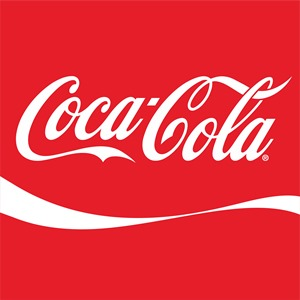

In [3]:
Image(filename="coca.jpeg")

(300, 300, 3)
Coca-cola image's width :  300
Coca-cola image's height :  300


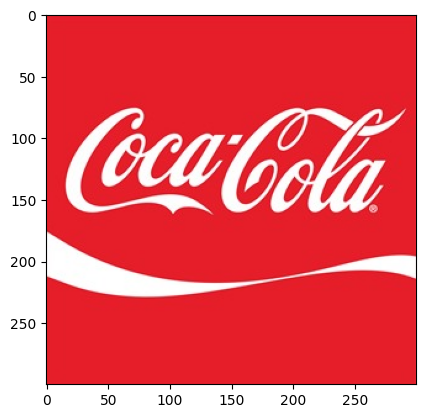

In [4]:
coca_bgr = cv2.imread('coca.jpeg')
# convert the BGR color map into RGP because matplotlib is always reversing the color map and matplptlib uses rgb while cv uses bgr
# Using the cvtColor Function
coca_RGB = cv2.cvtColor(coca_bgr,cv2.COLOR_BGR2RGB)
# Display the image in RGB COLOR --matplotlib 
plt.imshow(coca_RGB)
# Get the shape to know whether it matches the shape of the background photo or not
print(coca_RGB.shape)
# Get the The width and the height for coca
coca_width = coca_RGB.shape[0] # No of rows : 300
coca_height= coca_RGB.shape[1] # No of Cols : 300
print("Coca-cola image's width : ",coca_width)
print("Coca-cola image's height : ",coca_height)

(400, 640, 3)
Dimensions before matching =  (400, 640)
BackGround image's width :  400
BackGround image's height :  640


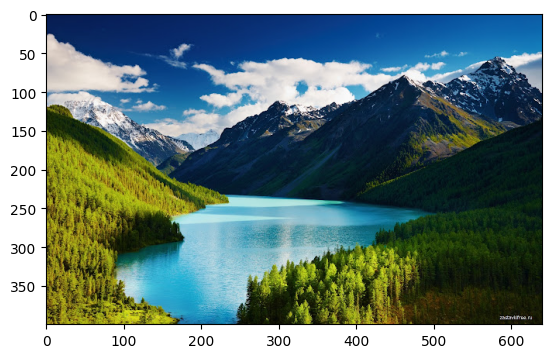

In [6]:
Lala_bgr = cv2.imread('nature.jpg')
# convert the BGR color map into RGP because matplotlib is always reversing the color map
# Using the cvtColor Function to reverse the color map
lala_RGB = cv2.cvtColor(Lala_bgr,cv2.COLOR_BGR2RGB)
# Display the image in RGB COLOR 
plt.imshow(lala_RGB)

# Get the shape to know whether it matches the shape of the background photo or not
print(lala_RGB.shape)
# Get the Background image Width and height
lala_width = lala_RGB.shape[0] # 400
lala_height= lala_RGB.shape[1] # 640
dim = (lala_width , lala_height)
print("Dimensions before matching = ", dim)
print("BackGround image's width : ",lala_width)
print("BackGround image's height : ",lala_height)

Dimensions after matching the ratios =  (300, 300)
(300, 300, 3)
Now, they both have the same size!


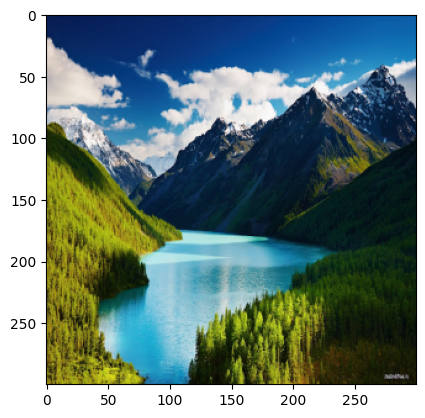

In [7]:
# Any aspect ratio is the ratio of the width (No of rows) shape[0] to the height shape[1] (No of columns)
Matching_ratio = coca_width/lala_height # 300 / 640
#  Get the Dimensions 
dimensions = (coca_width, int(lala_height * Matching_ratio)) # dimensions = (300 , int (640*(300/640))
print("Dimensions after matching the ratios = ",dimensions)
# Resizing the background image to fit with the coca image to ensure both have the same size
# Resize function takes (img, dimensions ,interpolation) and Override on the variable that holds the background image
lala_RGB = cv2.resize(lala_RGB, dimensions, interpolation=cv2.INTER_AREA)
print(lala_RGB.shape)
print("Now, they both have the same size!")
plt.imshow(lala_RGB)

(300, 300)


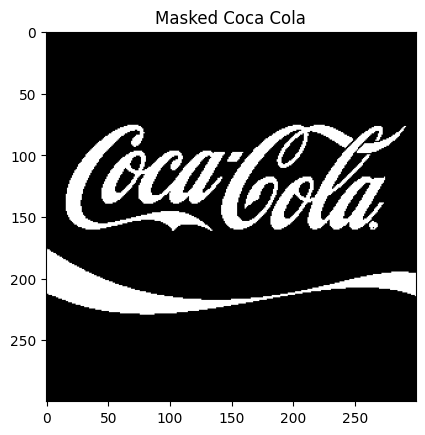

In [8]:
GrayCoca = cv2.cvtColor(coca_RGB,cv2.COLOR_RGB2GRAY)
# Make thresholding to create a binary mask 
# Any value between 130 will be set to 0 and above 225 will be set to 225
retval,coca_masked = cv2.threshold(GrayCoca,130,255,cv2.THRESH_BINARY)
plt.imshow(coca_masked, cmap="gray");plt.title("Masked Coca Cola")
print(coca_masked.shape)

(300, 300)


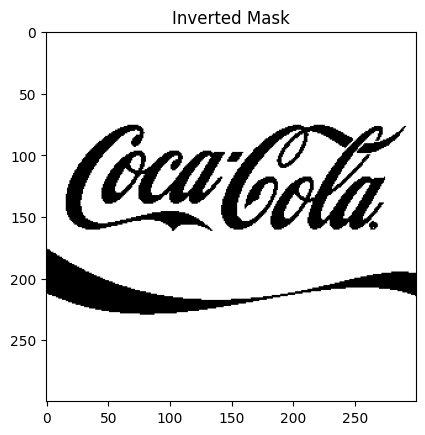

In [9]:
#Invert the mask using Bitwise Not
# Bitwise Not make the picture white
coca_inverted_mask = cv2.bitwise_not(coca_masked)
plt.imshow(coca_inverted_mask, cmap='gray');plt.title('Inverted Mask')
print(coca_inverted_mask.shape)

(300, 300, 3)


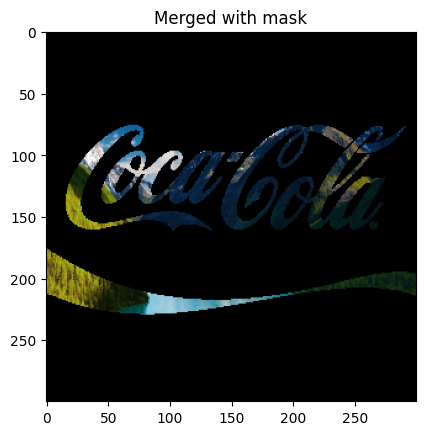

In [10]:
# Bitwise and to apply background on the mask.
lala_background = cv2.bitwise_and(lala_RGB,lala_RGB, mask = coca_masked)
plt.imshow(lala_background);plt.title('Merged with mask')
print(lala_background.shape)

Text(0.5, 1.0, 'Black Coca')

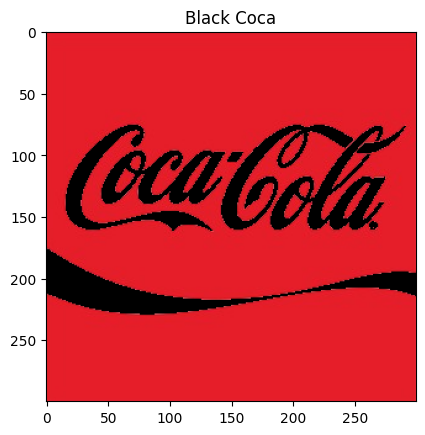

In [11]:
# Using the inverse of the masked cola by bitwise
# Coca and Coca = Coca (True) + inverted Mask
black_coca = cv2.bitwise_and(coca_RGB, coca_RGB, mask = coca_inverted_mask)
plt.imshow(black_coca);plt.title("Black Coca")

Text(0.5, 1.0, 'COCA-COLA Mixed')

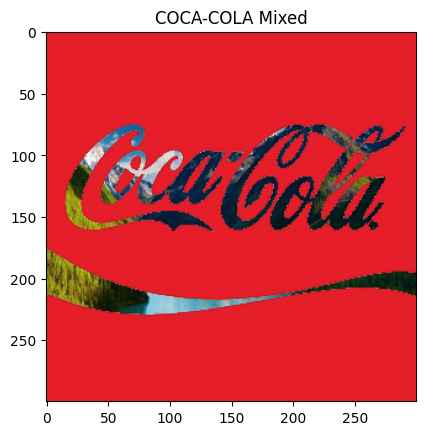

In [12]:
final_processing = cv2.add(lala_background,black_coca)
plt.imshow(final_processing);plt.title("COCA-COLA Mixed")

 (300, 300, 3) 		 (300, 300) 		 (300, 300) 		 (300, 300, 3) 		 (300, 300, 3) 		 (300, 300, 3)


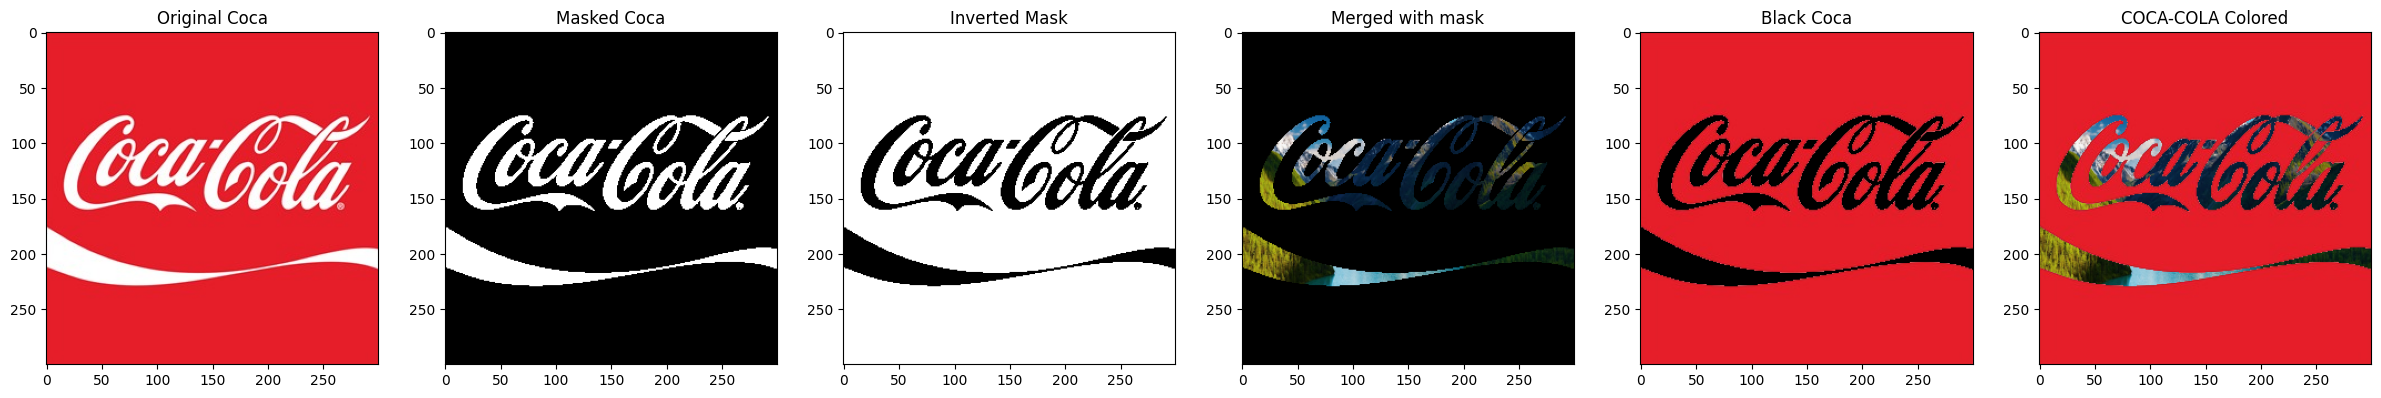

In [13]:
plt.figure(figsize = [30,5])
plt.subplot(161);plt.imshow(coca_RGB);plt.title("Original Coca")
plt.subplot(162);plt.imshow(coca_masked, cmap="gray");plt.title("Masked Coca")
plt.subplot(163);plt.imshow(coca_inverted_mask, cmap='gray');plt.title('Inverted Mask')
plt.subplot(164);plt.imshow(lala_background);plt.title('Merged with mask')
plt.subplot(165);plt.imshow(black_coca);plt.title("Black Coca")
plt.subplot(166);plt.imshow(final_processing);plt.title("COCA-COLA Colored")
print("",coca_RGB.shape,"\t\t",coca_masked.shape,"\t\t",coca_inverted_mask.shape,"\t\t",lala_background.shape,"\t\t",black_coca.shape,"\t\t",final_processing.shape)